# Credit Card Dataset

## Summary

### 1. Data Inspection

1.1. Packages

1.2. Loading data

1.3. Variables distribution

1.4. Class distribution


### 2. Data Preparation

2.1. Normalizing variable amount

2.2 Drop desnomalized variable amount

2.3. Split dataset

### 3. Define Metrics

3.1. Confusion Matrix

3.2. Recall, Precision and F1_score

3.3. Precision - Recall Curve

3.4. ROC Curve

3.5. Define (X , y) and Stratifed K-folds

### 4. Logistic Regression (LOG)

4.1. LOG - Without hyperparameters tuning

4.2. LOG - Grid Search CV to optimise F1 score

4.3. LOG - With best hyperparameters

### 5. Extreme Gradient Boosting (XGB)

5.1. XGB - Without hyperparameters tuning

5.2. XGB - plot learning curve

5.3. XGB - Grid Search CV to find best n_estimators (F1_score)

5.4. XGB - With best hyperparameters

5.5. Fit model using each importance as a threshold (Feature Selection)

    5.5.1 XGB Feature Importance (XGB-FI)
    5.5.2 ALICIA Feature Selection
    5.5.3 GBFS feature selection
    5.5.4 ECFS feature selection
    5.5.5 CFS
    5.5.6 Fisher

### 6. Random Forest (RF)

6.1. RF - Without hyperparameters tuning

6.2. RF - Grid Search CV to optimise F1_score

6.3. RF - With best hyperparameters

### 7. VotingClassifier = LOG - XGB - RF

7.1. VotingClassifier

-------------------------------

## 1. Data Inspection

### 1.1. Packages

In [1]:
# Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import warnings

/opt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1.2. Loading data

In [2]:
data = pd.read_csv('./dataset/creditcard.csv')

In [3]:
warnings.filterwarnings('ignore') #ignore warning messages 

### 1.3. Variables distribution

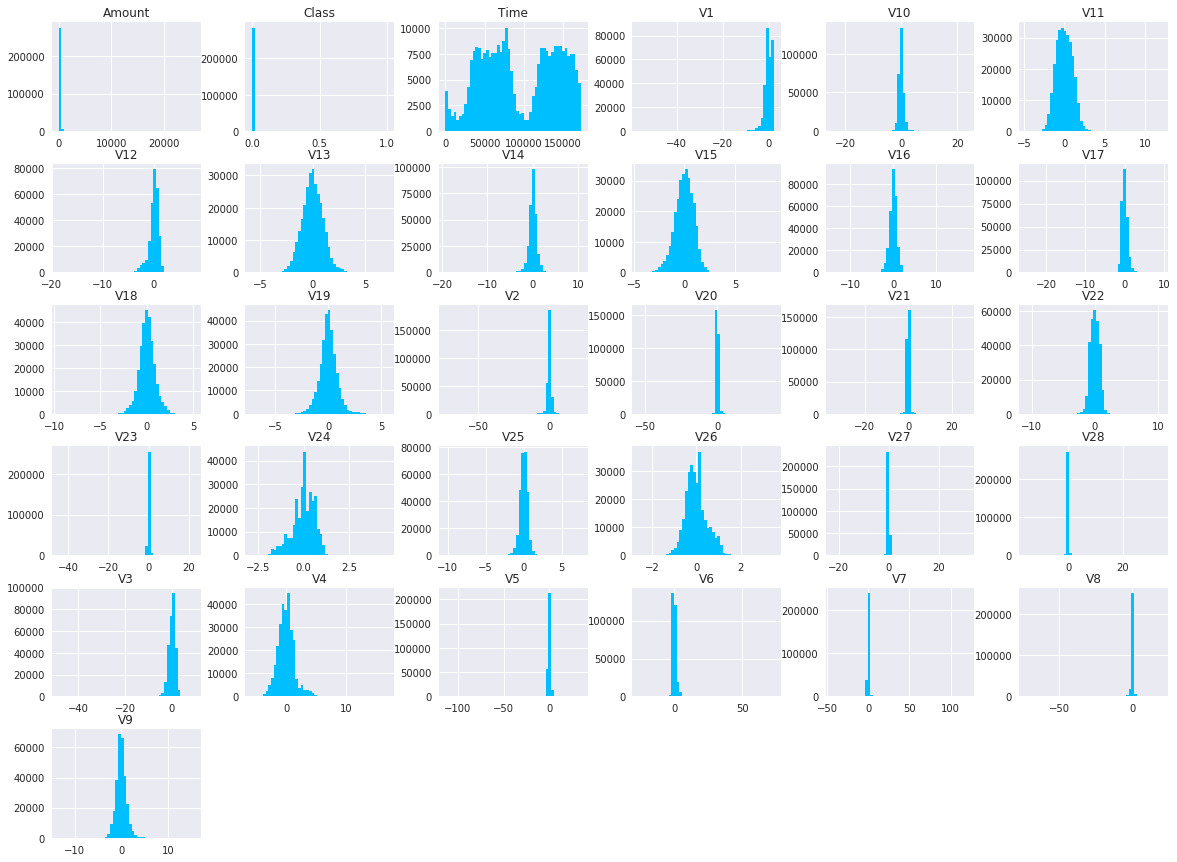

In [4]:
# Graph distribution
data.hist (bins=50, figsize=(20,15), color = 'deepskyblue')

plt.show()

In [4]:
# Describe dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.shape

(284807, 31)

### 1.4. Class distribution

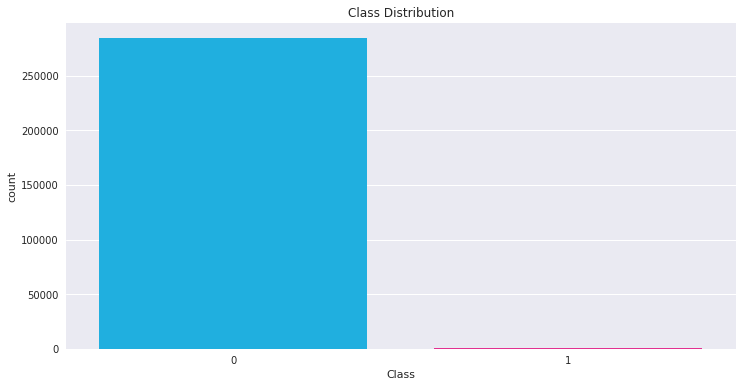

% of normal transacation       : 99.82725143693798
Number of normal transaction   : 284315
% of fraud transacation        : 0.1727485630620034
Number of fraud transaction    : 492


In [7]:
#Graph
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'Class', data = data, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(data[data['Class']==0])
Count_Fraud_transacation = len(data[data['Class']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of normal transacation       :', Percentage_of_Normal_transacation*100)
print('Number of normal transaction   :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of fraud transacation        :',Percentage_of_Fraud_transacation*100)
print('Number of fraud transaction    :', Count_Fraud_transacation)

This is an unbalanced class

## 2. Data Preparation

### 2.1. Normalizing variable amount

In [6]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

### 2.2 Drop desnomalized variable amount

In [7]:
data_norm = data.drop(['Amount'],axis=1)

### 2.3. Split dataset

In [8]:
# Cut in 2 datasets, one for training & test (cross validation), other for validation
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split (data_norm, test_size = 0.1, random_state = 42)

In [9]:
train_set.shape

(256326, 31)

In [10]:
test_set.shape

(28481, 31)

## 3. Define Metrics

### 3.1. Confusion Matrix

In [11]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 3.2. Recall, Precision and F1_score

In [12]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.4f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.4f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.4f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

### 3.3. Precision - Recall Curve

In [13]:
# precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

### 3.4. ROC Curve

In [14]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

### 3.5. Define (X , y) and Stratifed K-folds

In [15]:
# def X and Y
y = np.array(data_norm.Class.tolist())
data_no_class = data_norm.drop('Class', 1)
X = np.array(data_no_class.as_matrix())

In [16]:
# Stratified k-folds
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
for train_index, test_index in skf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

In [17]:
X_train.shape

(227846, 30)

In [18]:
X_test.shape

(56961, 30)

## 4. Logistic Regression (LOG)

### 4.1. LOG - Without hyperparameters tuning

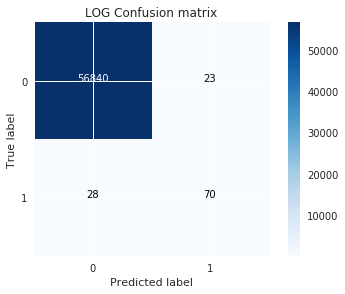

Precision =     0.7527
Recall    =     0.7143
F1_score  =     0.7330


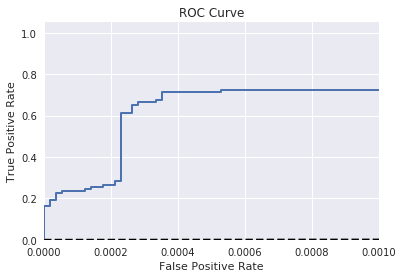

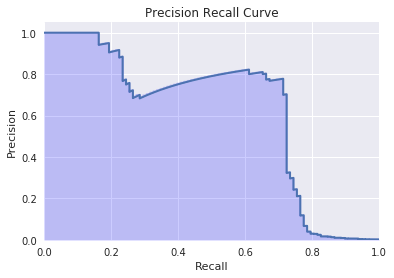

In [19]:
# Logistic regression 
log_cfl = LogisticRegression()

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)  

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [20]:
# Show parameters currently use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(log_cfl.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### 4.2. LOG - Grid Search CV to optimise F1 Score

In [264]:
# Find the best parameters : f1 optimisation
from sklearn.model_selection import GridSearchCV
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'f1', verbose = 1)
CV_log_cfl.fit(X_train, y_train)

best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  6.0min finished


The best parameters for using this model is {'C': 1, 'class_weight': None, 'penalty': 'l1'}


### 4.3. LOG - With best hyperparameters

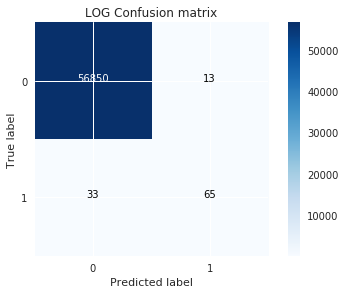

Precision =     0.8333
Recall    =     0.6633
F1_score  =     0.7386


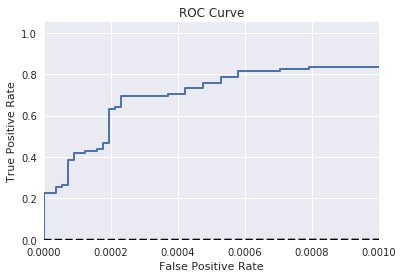

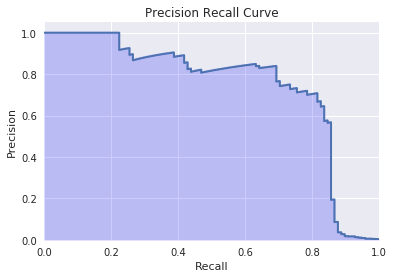

In [265]:
#Logistic regression with the best parameters
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

#plt.savefig('5.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_log, tpr_log, t_log = fpr, tpr, t
precision_log, recall_log, thresholds_log = precision, recall, thresholds

## 5. Extreme Gradient Boosting (XGB)

### 5.1. XGB - Without hyperparameters tuning

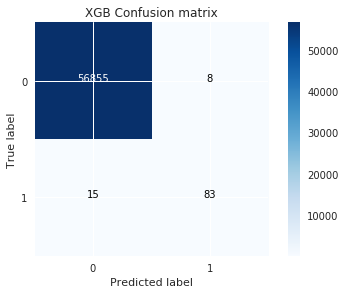

Precision =     0.9121
Recall    =     0.8469
F1_score  =     0.8783


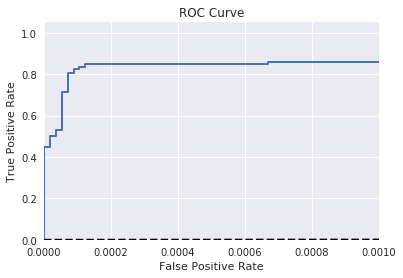

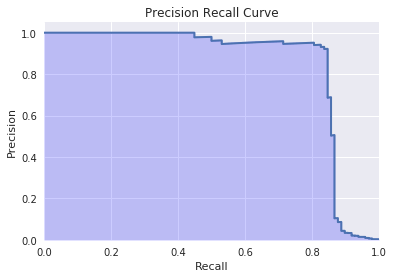

In [21]:
# xgb
#xgb_cfl = xgb.XGBClassifier(n_jobs = -1)
xgb_cfl = xgb.XGBClassifier()

eval_set = [(X_train, y_train), (X_test, y_test)]

xgb_cfl.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
y_pred = xgb_cfl.predict(X_test)
y_score = xgb_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='XGB Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

### 5.2. XGB - plot learning curve

Lets use retrieve performance metrics from XGB model. 

In [22]:
from matplotlib import pyplot

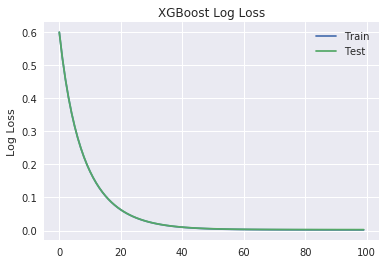

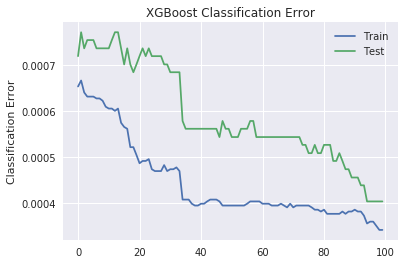

In [23]:
# retrieve performance metrics
results = xgb_cfl.evals_result()

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [24]:
print('Parameters currently in use:\n')
pprint(xgb_cfl.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'silent': True,
 'subsample': 1}


### 5.3. XGB - Grid Search CV to find best n_estimators (F1_score) 

Grid search CV is really slow, you can add or remove some hyperparameters (or use early_stop) :

In [30]:
param_grid = {
            'n_estimators': [400,500],
            'max_depth': [6,7,8],
            'learning_rate': [0.05,0.1],
            'min_child_weight': [1,10], #tuning min_child_weight subsample colsample_bytree for fighting against overfit
            'seed': [100] #ensemble xgboost with multiple seeds may reduce variance
              }

In [33]:
CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, n_jobs=5, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV]  learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100, total= 8.3min
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV]  learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100, total= 8.4min
[CV] learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=400, seed=100 
[CV]  learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100, total= 9.4min
[CV] learning_rate=0.05, max_dept

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 56.7min


[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estimators=400, seed=100, total= 5.9min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estimators=400, seed=100, total= 5.4min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estimators=500, seed=100, total= 7.1min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estimators=500, seed=100, total= 7.1min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV]  learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, seed=100, total= 7.5min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estim

[Parallel(n_jobs=5)]: Done  72 out of  72 | elapsed: 129.0min finished


The best parameters for using this model is {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 400, 'seed': 100}


### 5.4. XGB - With best hyperparameters

In [34]:
xgb_cfl = xgb.XGBClassifier(n_estimators = best_parameters['n_estimators'], 
                            max_depth = best_parameters['max_depth'],
                            learning_rate = best_parameters['learning_rate'],
                            min_child_weight = best_parameters['min_child_weight'],
                            seed = best_parameters['seed'])

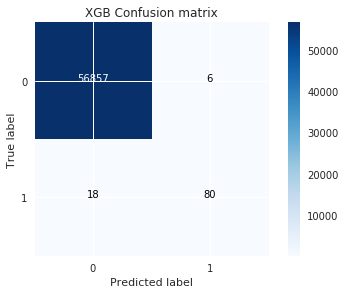

Precision =     0.930
Recall    =     0.816
F1_score  =     0.870


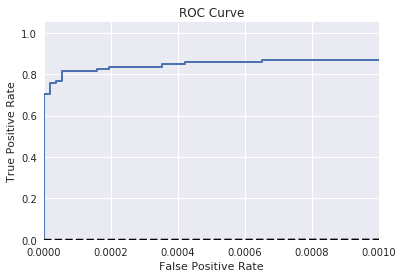

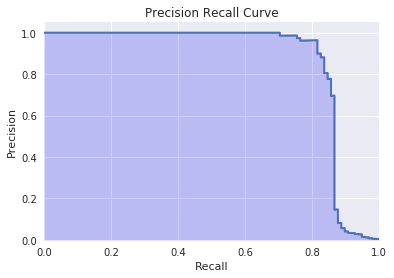

In [22]:
xgb_cfl.fit(X_train, y_train)
y_pred = xgb_cfl.predict(X_test)
y_score = xgb_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'XGB Confusion matrix')
#plt.savefig('2.xgb_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_xgb, tpr_xgb, t_xgb = fpr, tpr, t
precision_xgb, recall_xgb, thresholds_xgb = precision, recall, thresholds

### 5.5. Fit model using each importance as a threshold

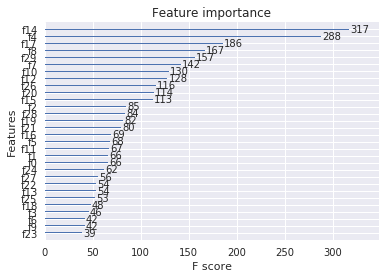

In [157]:
from xgboost import plot_importance

# plot feature importance
#plot_importance(xgb_cfl,importance_type='weight')
plot_importance(xgb_cfl)
pyplot.show()

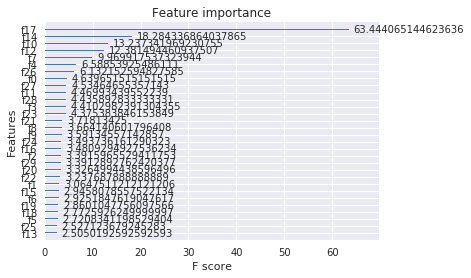

In [26]:
# plot feature importance
plot_importance(xgb_cfl,importance_type='gain')
pyplot.show()

In [225]:
#xgb_cfl.feature_importances_
fscores = xgb_cfl.booster().get_score(importance_type='weight')

Now, lets sort features using importance value

In [235]:
from operator import itemgetter
#sort features
fscores_sort = sorted(fscores.items(), key=itemgetter(1))

In [253]:
xgb_features = []
importances = []
#importances = np.zeros(30)
for key, value in fscores_sort:# fscores.items():
    xgb_features.append (key)
    importances.append (value)
    #importances[int(k[1:])] = value

In [254]:
print(xgb_features)
print(importances)

['f23', 'f9', 'f6', 'f3', 'f18', 'f25', 'f13', 'f22', 'f27', 'f24', 'f0', 'f1', 'f11', 'f5', 'f16', 'f21', 'f19', 'f28', 'f2', 'f15', 'f20', 'f26', 'f12', 'f10', 'f7', 'f29', 'f8', 'f17', 'f4', 'f14']
[39, 42, 42, 46, 48, 53, 54, 54, 56, 62, 66, 66, 67, 68, 69, 80, 82, 84, 85, 113, 114, 116, 128, 130, 142, 157, 167, 186, 288, 317]


As XGB feature importance changes features names, we fix this replacing 'f'

In [255]:
xgb_features = [w.replace('f', 'V') for w in xgb_features]
xgb_features = [w.replace('V0', 'Time') for w in xgb_features]
xgb_features = [w.replace('V29', 'normAmount') for w in xgb_features]

print(xgb_features)
print(importances)

['V23', 'V9', 'V6', 'V3', 'V18', 'V25', 'V13', 'V22', 'V27', 'V24', 'Time', 'V1', 'V11', 'V5', 'V16', 'V21', 'V19', 'V28', 'V2', 'V15', 'V20', 'V26', 'V12', 'V10', 'V7', 'normAmount', 'V8', 'V17', 'V4', 'V14']
[39, 42, 42, 46, 48, 53, 54, 54, 56, 62, 66, 66, 67, 68, 69, 80, 82, 84, 85, 113, 114, 116, 128, 130, 142, 157, 167, 186, 288, 317]


[ 0.02184707  0.02184707  0.02813638  0.01522675  0.09533267  0.0225091
  0.01390268  0.0470043   0.05527971  0.01390268  0.04303211  0.02217809
  0.04237008  0.01787488  0.10493214  0.03740483  0.02284012  0.06156902
  0.01588878  0.02714333  0.03773585  0.0264813   0.01787488  0.01290963
  0.02052301  0.01754386  0.03839788  0.01853691  0.02780536  0.05196955]


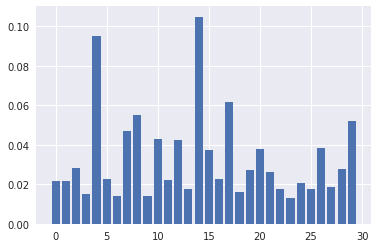

In [36]:
# feature importance
print(xgb_cfl.feature_importances_)
# plot
pyplot.bar(range(len(xgb_cfl.feature_importances_)), xgb_cfl.feature_importances_)
pyplot.show()

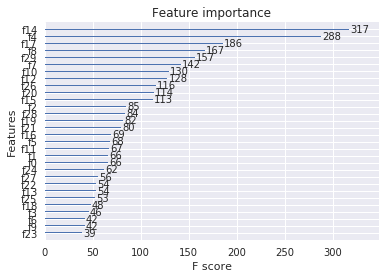

In [37]:
from xgboost import plot_importance

# plot feature importance
plot_importance(xgb_cfl)
pyplot.show()

### 5.5.1 Using XGB Feature Importante (XGB-FI) 

In [28]:
from numpy import sort
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import time
import locale

In [111]:
### Using XGB feature importance 'weight'
thresholds = sort(xgb_cfl.feature_importances_)

In [112]:
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_cfl, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # calculate time
    start_time = time.time()
    # train model
    selection_model = xgb.XGBClassifier(n_estimators = 400)
    selection_model.fit(select_X_train, y_train)
    end_time = time.time()
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    #predictions = [round(value) for value in y_pred]
    #accuracy = accuracy_score(y_test, predictions)
    #print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print("-------- Thresh=%.3f, n=%d, %s seconds" % (thresh, select_X_train.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test, y_pred)
    show_metrics()

-------- Thresh=0.013, n=30, 120.84564805030823 seconds
Precision =     0.9419
Recall    =     0.8265
F1_score  =     0.8804
-------- Thresh=0.014, n=29, 114.52857232093811 seconds
Precision =     0.9318
Recall    =     0.8367
F1_score  =     0.8817
-------- Thresh=0.014, n=29, 117.78100657463074 seconds
Precision =     0.9318
Recall    =     0.8367
F1_score  =     0.8817
-------- Thresh=0.015, n=27, 88.51035594940186 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
-------- Thresh=0.016, n=26, 111.52727818489075 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
-------- Thresh=0.018, n=25, 90.41162347793579 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
-------- Thresh=0.018, n=24, 97.86986207962036 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
-------- Thresh=0.018, n=24, 88.8759229183197 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
-----

### 5.5.1 Information Gain

In [363]:
xgb_features = ['V23', 'V9', 'V6', 'V3', 'V18', 'V25',
                   'V13', 'V22', 'V27', 'V24', 'Time', 'V1',
                   'V11', 'V5', 'V16', 'V21', 'V19', 'V28',
                   'V2', 'V15', 'V20', 'V26', 'V12', 'V10',
                   'V7', 'normAmount', 'V8', 'V17', 'V4', 'V14']

In [364]:
xgb_cfl_xgb = xgb.XGBClassifier(n_estimators = 400, 
                            max_depth = 7,
                            learning_rate = 0.05,
                            min_child_weight = 10,
                            seed = 100)

In [365]:
data_xgb = data.drop(['Amount'],axis=1)

for thresh in xgb_features:
    
    # def X and Y
    y_xgb = np.array(data_xgb.Class.tolist())
    data_no_class_xgb = data_xgb.drop('Class', 1)
    X_xgb = np.array(data_no_class_xgb.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_xgb, y_xgb):
        X_train_xgb, y_train_xgb = X_xgb[train_index], y_xgb[train_index]
        X_test_xgb, y_test_xgb = X_xgb[test_index], y_xgb[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    #xgb_cfl_xgb = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_xgb.fit(X_train_xgb, y_train_xgb)
    end_time = time.time()

    # eval model
    y_pred_xgb = xgb_cfl_xgb.predict(X_test_xgb)
    #y_score = xgb_cfl.predict_proba(X_test)[:,1]

    print("------------------ remove=%s, n=%d, %s seconds" % (thresh, X_train_xgb.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_xgb, y_pred_xgb)
    show_metrics()
    
    # Remove feature
    data_xgb = data_xgb.drop(thresh,axis=1)

------------------ remove=V23, n=30, 102.05987191200256 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
------------------ remove=V9, n=29, 100.50279402732849 seconds
Precision =     0.9101
Recall    =     0.8265
F1_score  =     0.8663
------------------ remove=V6, n=28, 94.65924072265625 seconds
Precision =     0.9425
Recall    =     0.8367
F1_score  =     0.8865
------------------ remove=V3, n=27, 92.33237767219543 seconds
Precision =     0.9213
Recall    =     0.8367
F1_score  =     0.8770
------------------ remove=V18, n=26, 90.24448919296265 seconds
Precision =     0.9101
Recall    =     0.8265
F1_score  =     0.8663
------------------ remove=V25, n=25, 87.47981691360474 seconds
Precision =     0.9101
Recall    =     0.8265
F1_score  =     0.8663
------------------ remove=V13, n=24, 82.02699995040894 seconds
Precision =     0.9111
Recall    =     0.8367
F1_score  =     0.8723
------------------ remove=V22, n=23, 80.15961074829102 seconds
Precision =   

### 5.5.2 Using Alicia Feature Selection 

In [356]:
alicia_features = ["V16", "V19", "V18", "V2", "V27", "V17",
                   "V20", "V6", "V8", "normAmount", "V7", "V10",
                   "V21", "V9" , "V13", "V23", "V5" , "V22",
                   "V15","V26", "V25" , "V11", "V24", "V12",
                   "V28" , "V3", "V1", "Time", "V14", "V4"]

In [357]:
xgb_cfl_alicia = xgb.XGBClassifier(n_estimators = 400, 
                            max_depth = 7,
                            learning_rate = 0.05,
                            min_child_weight = 10,
                            seed = 100)

In [359]:
data_alicia = data.drop(['Amount'],axis=1)

for thresh in alicia_features:
    
    # def X and Y
    y_alicia = np.array(data_alicia.Class.tolist())
    data_no_class_alicia = data_alicia.drop('Class', 1)
    X_alicia = np.array(data_no_class_alicia.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_alicia, y_alicia):
        X_train_alicia, y_train_alicia = X_alicia[train_index], y_alicia[train_index]
        X_test_alicia, y_test_alicia = X_alicia[test_index], y_alicia[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    xgb_cfl_alicia = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_alicia.fit(X_train_alicia, y_train_alicia)
    end_time = time.time()

    # eval model
    y_pred_alicia = xgb_cfl_alicia.predict(X_test_alicia)
    #y_score = xgb_cfl.predict_proba(X_test)[:,1]

    print("------------------ remove next=%s, n=%d, %s seconds" % (thresh, X_train_alicia.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_alicia, y_pred_alicia)
    show_metrics()
    
    # Remove feature
    data_alicia = data_alicia.drop(thresh,axis=1)

------------------ remove next=V16, n=30, 123.55712032318115 seconds
Precision =     0.9419
Recall    =     0.8265
F1_score  =     0.8804
------------------ remove next=V19, n=29, 125.74887728691101 seconds
Precision =     0.9412
Recall    =     0.8163
F1_score  =     0.8743
------------------ remove next=V18, n=28, 123.32146668434143 seconds
Precision =     0.9425
Recall    =     0.8367
F1_score  =     0.8865
------------------ remove next=V2, n=27, 116.92188453674316 seconds
Precision =     0.9425
Recall    =     0.8367
F1_score  =     0.8865
------------------ remove next=V27, n=26, 112.49968981742859 seconds
Precision =     0.9425
Recall    =     0.8367
F1_score  =     0.8865
------------------ remove next=V17, n=25, 112.55688714981079 seconds
Precision =     0.9535
Recall    =     0.8367
F1_score  =     0.8913
------------------ remove next=V20, n=24, 102.55065441131592 seconds
Precision =     0.9375
Recall    =     0.7653
F1_score  =     0.8427
------------------ remove next=V6, 

### 5.5.3 GBFS feature selection

In [270]:
gbfs_features = ['V13', 'V25', 'V5', 'V18', 'V19', 'V6',
                 'V15', 'V1', 'V22', 'V20', 'normAmount', 'V2', 
                 'V16', 'V24', 'V9', 'V8', 'V21', 'V23', 
                 'V3', 'V28', 'V11', 'V27', 'Time', 'V26', 
                 'V4', 'V7', 'V12', 'V10', 'V14', 'V17']

In [271]:
xgb_cfl_gbfs = xgb.XGBClassifier(n_estimators = 400, 
                            max_depth = 7,
                            learning_rate = 0.05,
                            min_child_weight = 10,
                            seed = 100)

In [272]:
data_gbfs = data.drop(['Amount'],axis=1)

for thresh in gbfs_features:
    
    # def X and Y
    y_gbfs = np.array(data_gbfs.Class.tolist())
    data_no_class_gbfs = data_gbfs.drop('Class', 1)
    X_gbfs = np.array(data_no_class_gbfs.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_gbfs, y_gbfs):
        X_train_gbfs, y_train_gbfs = X_gbfs[train_index], y_gbfs[train_index]
        X_test_gbfs, y_test_gbfs = X_gbfs[test_index], y_gbfs[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    #xgb_cfl_gbfs = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_gbfs.fit(X_train_gbfs, y_train_gbfs)
    end_time = time.time()

    # eval model
    y_pred_gbfs = xgb_cfl_gbfs.predict(X_test_gbfs)
    #y_score = xgb_cfl.predict_proba(X_test)[:,1]

    print("------------------ remove next=%s, n=%d, %s seconds" % (thresh, X_train_gbfs.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_gbfs, y_pred_gbfs)
    show_metrics()
    
    # Remove feature
    data_gbfs = data_gbfs.drop(thresh,axis=1)

------------------ remove next=V13, n=30, 183.43859696388245 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
------------------ remove next=V25, n=29, 178.33075332641602 seconds
Precision =     0.9195
Recall    =     0.8163
F1_score  =     0.8649
------------------ remove next=V5, n=28, 171.26709938049316 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
------------------ remove next=V18, n=27, 169.31834959983826 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
------------------ remove next=V19, n=26, 160.0706067085266 seconds
Precision =     0.9419
Recall    =     0.8265
F1_score  =     0.8804
------------------ remove next=V6, n=25, 145.79602456092834 seconds
Precision =     0.9101
Recall    =     0.8265
F1_score  =     0.8663
------------------ remove next=V15, n=24, 139.92890167236328 seconds
Precision =     0.8889
Recall    =     0.8163
F1_score  =     0.8511
------------------ remove next=V1, n=

## 5.5.4 ECFS feature selection

In [360]:
ecfs_features = ["V16", 'V19', 'V2', 'V18', 'V27', 'V17',
                 'V20', 'V6', 'normAmount', 'V8', 'V10', 'V7',
                 'V21', 'V9', 'V13', 'V23', 'V26', 'V4',
                 'V22', 'V15', 'V5', 'V14', 'V24', 'V11',
                 'V25', 'V12', 'V28', 'V3', 'V1', 'Time']

In [361]:
xgb_cfl_ecfs = xgb.XGBClassifier(n_estimators = 400, 
                            max_depth = 7,
                            learning_rate = 0.05,
                            min_child_weight = 10,
                            seed = 100)

In [362]:
data_ecfs = data.drop(['Amount'],axis=1)

for thresh in ecfs_features:
    
    # def X and Y
    y_ecfs = np.array(data_ecfs.Class.tolist())
    data_no_class_ecfs = data_ecfs.drop('Class', 1)
    X_ecfs = np.array(data_no_class_ecfs.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_ecfs, y_ecfs):
        X_train_ecfs, y_train_ecfs = X_ecfs[train_index], y_ecfs[train_index]
        X_test_ecfs, y_test_ecfs = X_ecfs[test_index], y_ecfs[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    #xgb_cfl_gbfs = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_ecfs.fit(X_train_ecfs, y_train_ecfs)
    end_time = time.time()

    # eval model
    y_pred_ecfs = xgb_cfl_ecfs.predict(X_test_ecfs)
    #y_score = xgb_cfl.predict_proba(X_test)[:,1]

    print("------------------ remove next=%s, n=%d, %s seconds" % (thresh, X_train_ecfs.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_ecfs, y_pred_ecfs)
    show_metrics()
    
    # Remove feature
    data_ecfs = data_ecfs.drop(thresh,axis=1)

------------------ remove next=V16, n=30, 177.69326400756836 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
------------------ remove next=V19, n=29, 171.33666849136353 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
------------------ remove next=V2, n=28, 163.90728092193604 seconds
Precision =     0.9195
Recall    =     0.8163
F1_score  =     0.8649
------------------ remove next=V18, n=27, 161.75754356384277 seconds
Precision =     0.9195
Recall    =     0.8163
F1_score  =     0.8649
------------------ remove next=V27, n=26, 157.1930947303772 seconds
Precision =     0.9080
Recall    =     0.8061
F1_score  =     0.8541
------------------ remove next=V17, n=25, 146.7282955646515 seconds
Precision =     0.9205
Recall    =     0.8265
F1_score  =     0.8710
------------------ remove next=V20, n=24, 141.50370693206787 seconds
Precision =     0.9167
Recall    =     0.7857
F1_score  =     0.8462
------------------ remove next=V6, n=

### 5.5.5 CFS

In [340]:
cfs_features = ['V4', 'V14', 'V15', 'V11', 'V9', 'V25',
                 'V16', 'V20', 'V12', 'V28', 'normAmount', 'V3',
                 'V7', 'V2', 'V8', 'V5', 'V24', 'V1',
                 'V18', 'V26', 'V23', 'V17', 'V6', 'V21',
                 'V19', 'V27', 'V10', 'Time', 'V22', 'V13']

In [341]:
xgb_cfl_cfs = xgb.XGBClassifier(n_estimators = 400, 
                            max_depth = 7,
                            learning_rate = 0.05,
                            min_child_weight = 10,
                            seed = 100)

In [342]:
data_cfs = data.drop(['Amount'],axis=1)

for thresh in cfs_features:
    
    # def X and Y
    y_cfs = np.array(data_cfs.Class.tolist())
    data_no_class_cfs = data_cfs.drop('Class', 1)
    X_cfs = np.array(data_no_class_cfs.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_cfs, y_cfs):
        X_train_cfs, y_train_cfs = X_cfs[train_index], y_cfs[train_index]
        X_test_cfs, y_test_cfs = X_cfs[test_index], y_cfs[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    #xgb_cfl_gbfs = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_cfs.fit(X_train_cfs, y_train_cfs)
    end_time = time.time()

    # eval model
    y_pred_cfs = xgb_cfl_cfs.predict(X_test_cfs)
    #y_score = xgb_cfl.predict_proba(X_test)[:,1]

    print("------------------ remove next=%s, n=%d, %s seconds" % (thresh, X_train_cfs.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_cfs, y_pred_cfs)
    show_metrics()
    
    # Remove feature
    data_cfs = data_cfs.drop(thresh,axis=1)

------------------ remove next=V4, n=30, 199.71694421768188 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
------------------ remove next=V14, n=29, 193.85301303863525 seconds
Precision =     0.9195
Recall    =     0.8163
F1_score  =     0.8649
------------------ remove next=V15, n=28, 198.11867761611938 seconds
Precision =     0.9136
Recall    =     0.7551
F1_score  =     0.8268
------------------ remove next=V11, n=27, 177.29839086532593 seconds
Precision =     0.9342
Recall    =     0.7245
F1_score  =     0.8161
------------------ remove next=V9, n=26, 170.84053254127502 seconds
Precision =     0.9250
Recall    =     0.7551
F1_score  =     0.8315
------------------ remove next=V25, n=25, 159.5028853416443 seconds
Precision =     0.9125
Recall    =     0.7449
F1_score  =     0.8202
------------------ remove next=V16, n=24, 151.17483115196228 seconds
Precision =     0.9136
Recall    =     0.7551
F1_score  =     0.8268
------------------ remove next=V20, n

### 5.5.6 Fisher

In [343]:
fisher_features = ['V23', 'V22', 'V25', 'V28', 'V8', 'V20',
                 'V27', 'V26', 'V15', 'V13', 'V21','V24',
                 'V5', 'V6', 'normAmount', 'V2', 'V7', 'V19',
                 'V1', 'Time', 'V9', 'V3', 'V10', 'V18', 
                 'V16', 'V17', 'V12', 'V14', 'V4', 'V11']

In [344]:
xgb_cfl_fisher = xgb.XGBClassifier(n_estimators = 400, 
                            max_depth = 7,
                            learning_rate = 0.05,
                            min_child_weight = 10,
                            seed = 100)

In [345]:
data_fisher = data.drop(['Amount'],axis=1)

for thresh in fisher_features:
    
    # def X and Y
    y_fisher = np.array(data_fisher.Class.tolist())
    data_no_class_fisher = data_fisher.drop('Class', 1)
    X_fisher = np.array(data_no_class_fisher.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_fisher, y_fisher):
        X_train_fisher, y_train_fisher = X_fisher[train_index], y_fisher[train_index]
        X_test_fisher, y_test_fisher = X_fisher[test_index], y_fisher[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    #xgb_cfl_gbfs = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_fisher.fit(X_train_fisher, y_train_fisher)
    end_time = time.time()

    # eval model
    y_pred_fisher = xgb_cfl_fisher.predict(X_test_fisher)
    #y_score = xgb_cfl.predict_proba(X_test)[:,1]

    print("------------------ remove next=%s, n=%d, %s seconds" % (thresh, X_train_fisher.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_fisher, y_pred_fisher)
    show_metrics()
    
    # Remove feature
    data_fisher = data_fisher.drop(thresh,axis=1)

------------------ remove next=V23, n=30, 173.7924132347107 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
------------------ remove next=V22, n=29, 173.4275345802307 seconds
Precision =     0.9101
Recall    =     0.8265
F1_score  =     0.8663
------------------ remove next=V25, n=28, 164.0085117816925 seconds
Precision =     0.9205
Recall    =     0.8265
F1_score  =     0.8710
------------------ remove next=V28, n=27, 160.2989251613617 seconds
Precision =     0.9000
Recall    =     0.8265
F1_score  =     0.8617
------------------ remove next=V8, n=26, 157.5546452999115 seconds
Precision =     0.9091
Recall    =     0.8163
F1_score  =     0.8602
------------------ remove next=V20, n=25, 151.07840156555176 seconds
Precision =     0.9091
Recall    =     0.8163
F1_score  =     0.8602
------------------ remove next=V27, n=24, 145.13553023338318 seconds
Precision =     0.9101
Recall    =     0.8265
F1_score  =     0.8663
------------------ remove next=V26, n=23

### 5.5.6 Relief-F

In [353]:
relief_features = ['V24','V18','V25','V2','V1','V11',
                   'V5','V23','V9','V6','V13','V16',
                   'Time','V28','V8','V27','V21','V3',
                   'V19','V26','V22','V15','V12','normAmount',
                   'V20','V10','V7','V17','V4','V14']

In [354]:
xgb_cfl_relief = xgb.XGBClassifier(n_estimators = 400, 
                            max_depth = 7,
                            learning_rate = 0.05,
                            min_child_weight = 10,
                            seed = 100)

In [355]:
data_relief = data.drop(['Amount'],axis=1)

for thresh in relief_features:
    
    # def X and Y
    y_relief = np.array(data_relief.Class.tolist())
    data_no_class_relief = data_relief.drop('Class', 1)
    X_relief = np.array(data_no_class_relief.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_relief, y_relief):
        X_train_relief, y_train_relief = X_relief[train_index], y_relief[train_index]
        X_test_relief, y_test_relief = X_relief[test_index], y_relief[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    #xgb_cfl_gbfs = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_relief.fit(X_train_relief, y_train_relief)
    end_time = time.time()

    # eval model
    y_pred_relief = xgb_cfl_relief.predict(X_test_relief)
    #y_score = xgb_cfl.predict_proba(X_test)[:,1]

    print("------------------ remove next=%s, n=%d, %s seconds" % (thresh, X_train_relief.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_relief, y_pred_relief)
    show_metrics()
    
    # Remove feature
    data_relief = data_relief.drop(thresh,axis=1)

------------------ remove next=V24, n=30, 174.30015325546265 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
------------------ remove next=V18, n=29, 165.82638502120972 seconds
Precision =     0.9205
Recall    =     0.8265
F1_score  =     0.8710
------------------ remove next=V25, n=28, 159.63005542755127 seconds
Precision =     0.9205
Recall    =     0.8265
F1_score  =     0.8710
------------------ remove next=V2, n=27, 157.6857554912567 seconds
Precision =     0.9205
Recall    =     0.8265
F1_score  =     0.8710
------------------ remove next=V1, n=26, 153.64183735847473 seconds
Precision =     0.9205
Recall    =     0.8265
F1_score  =     0.8710
------------------ remove next=V11, n=25, 145.0488519668579 seconds
Precision =     0.9205
Recall    =     0.8265
F1_score  =     0.8710
------------------ remove next=V5, n=24, 140.55816388130188 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
------------------ remove next=V23, n=2

### 5.5.6 Information Gain (IG)

In [25]:
ig_features = ['V23','V22','V5','V18','V24','Time',
               'V15','V3','normAmount','V19','V6','V25',
               'V11','V8','V16','V1','V2','V28',
               'V20','V26','V21','V13','V4','V27',
               'V9','V7','V12','V10','V14','V17']

In [26]:
xgb_cfl_ig = xgb.XGBClassifier(n_estimators = 400, 
                            max_depth = 7,
                            learning_rate = 0.05,
                            min_child_weight = 10,
                            seed = 100)

In [29]:
data_ig = data.drop(['Amount'],axis=1)

for thresh in ig_features:
    
    # def X and Y
    y_ig = np.array(data_ig.Class.tolist())
    data_no_class_ig = data_ig.drop('Class', 1)
    X_ig = np.array(data_no_class_ig.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_ig, y_ig):
        X_train_ig, y_train_ig = X_ig[train_index], y_ig[train_index]
        X_test_ig, y_test_ig = X_ig[test_index], y_ig[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    #xgb_cfl_gbfs = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_ig.fit(X_train_ig, y_train_ig)
    end_time = time.time()

    # eval model
    y_pred_ig = xgb_cfl_ig.predict(X_test_ig)
    #y_score = xgb_cfl.predict_proba(X_test)[:,1]

    print("------------------ remove next=%s, n=%d, %s seconds" % (thresh, X_train_ig.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_ig, y_pred_ig)
    show_metrics()
    
    # Remove feature
    data_ig = data_ig.drop(thresh,axis=1)

------------------ remove next=V23, n=30, 113.87270951271057 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
------------------ remove next=V22, n=29, 108.8031804561615 seconds
Precision =     0.9101
Recall    =     0.8265
F1_score  =     0.8663
------------------ remove next=V5, n=28, 105.03649425506592 seconds
Precision =     0.9205
Recall    =     0.8265
F1_score  =     0.8710
------------------ remove next=V18, n=27, 106.14450788497925 seconds
Precision =     0.8791
Recall    =     0.8163
F1_score  =     0.8466
------------------ remove next=V24, n=26, 105.20197629928589 seconds
Precision =     0.8901
Recall    =     0.8265
F1_score  =     0.8571
------------------ remove next=Time, n=25, 103.2844467163086 seconds
Precision =     0.8901
Recall    =     0.8265
F1_score  =     0.8571
------------------ remove next=V15, n=24, 89.79092836380005 seconds
Precision =     0.8889
Recall    =     0.8163
F1_score  =     0.8511
------------------ remove next=V3, n=

### 5.5.7 Gain Ratio (GR)

In [30]:
gr_features = ['V23','V22','V6','V18','V24','V27',
               'V3','V15','V5','V19','V25','V10',
               'V16','V11','V26','V8','normAmount','V1',
               'V20','V28','V2','V21','V14','Time',
               'V9','V13','V7','V4','V12','V17']

In [31]:
xgb_cfl_gr = xgb.XGBClassifier(n_estimators = 400, 
                            max_depth = 7,
                            learning_rate = 0.05,
                            min_child_weight = 10,
                            seed = 100)

In [32]:
data_gr = data.drop(['Amount'],axis=1)

for thresh in gr_features:
    
    # def X and Y
    y_gr = np.array(data_gr.Class.tolist())
    data_no_class_gr = data_gr.drop('Class', 1)
    X_gr = np.array(data_no_class_gr.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_gr, y_gr):
        X_train_gr, y_train_gr = X_gr[train_index], y_gr[train_index]
        X_test_gr, y_test_gr = X_gr[test_index], y_gr[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    #xgb_cfl_gbfs = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_gr.fit(X_train_gr, y_train_gr)
    end_time = time.time()

    # eval model
    y_pred_gr = xgb_cfl_gr.predict(X_test_gr)
    #y_score = xgb_cfl.predict_proba(X_test)[:,1]

    print("------------------ remove next=%s, n=%d, %s seconds" % (thresh, X_train_gr.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_gr, y_pred_gr)
    show_metrics()
    
    # Remove feature
    data_gr = data_gr.drop(thresh,axis=1)

------------------ remove next=V23, n=30, 104.263920545578 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
------------------ remove next=V22, n=29, 102.17823648452759 seconds
Precision =     0.9101
Recall    =     0.8265
F1_score  =     0.8663
------------------ remove next=V6, n=28, 97.50464820861816 seconds
Precision =     0.9205
Recall    =     0.8265
F1_score  =     0.8710
------------------ remove next=V18, n=27, 94.52262234687805 seconds
Precision =     0.9000
Recall    =     0.8265
F1_score  =     0.8617
------------------ remove next=V24, n=26, 97.23666548728943 seconds
Precision =     0.9000
Recall    =     0.8265
F1_score  =     0.8617
------------------ remove next=V27, n=25, 106.51707315444946 seconds
Precision =     0.9000
Recall    =     0.8265
F1_score  =     0.8617
------------------ remove next=V3, n=24, 102.67815947532654 seconds
Precision =     0.9000
Recall    =     0.8265
F1_score  =     0.8617
------------------ remove next=V15, n=23,

## 6. Random Forest (RF)

### 6.1. RF - Without hyperparameters tuning

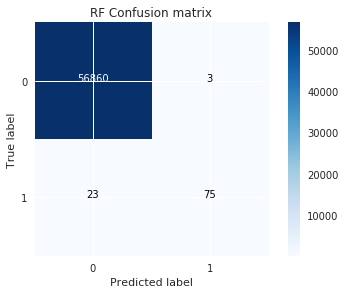

Precision =     0.9615
Recall    =     0.7653
F1_score  =     0.8523


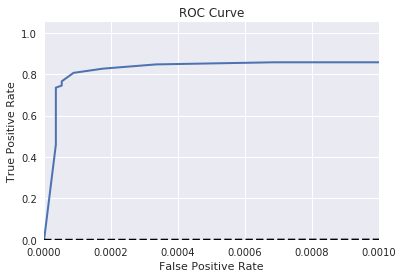

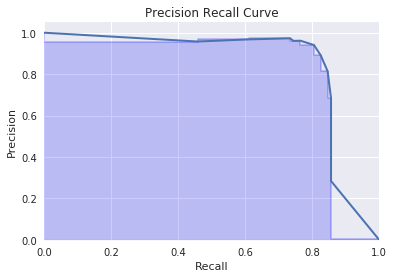

In [257]:
# Ramdom forest Classifier
rf_cfl = RandomForestClassifier(n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(X_train, y_train)
y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

### 6.2. RF - Grid Search CV to optimise F1_score 

Grid search CV is really slow, we can add or remove some parameters :

In [258]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'n_estimators': [100, 200, 500],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
            }

CV_rnd_cfl = GridSearchCV(estimator = rf_cfl, param_grid = param_grid, scoring = 'f1', verbose = 10, n_jobs = -1)
CV_rnd_cfl.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.6767676767676767, total= 1.3min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.7848101265822783, total= 1.4min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.0037190673723358604, total= 1.5min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_fe

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.9min


[CV]  max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.7899159663865546, total= 2.7min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.003794346423828496, total= 1.5min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.7916666666666667, total= 1.4min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.6900000000000001, total= 1.2min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.003925357811462044, total= 7.4min


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  9.2min


[CV] max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.7949790794979079, total= 6.7min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.68, total= 6.0min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.003773640100045342, total= 3.1min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.7866108786610878, total= 3.0min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.68, total= 2.7min
[CV] max_features=2, 

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 16.0min


[CV]  max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.6767676767676767, total= 1.2min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.0038909350124747533, total= 7.8min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.68, total= 6.2min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500, score=0.7949790794979079, total= 6.9min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.0037093143431540495, total= 2.9min
[CV] max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=5

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 21.0min


[CV]  max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.00480655582696399, total= 1.5min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.7949790794979079, total= 1.4min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.6900000000000001, total= 1.2min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, score=0.0039057876671795477, total= 7.2min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500, score=0.68, total= 5.8min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 29.2min


[CV]  max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.0040766278643884265, total= 1.5min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.7848101265822783, total= 1.4min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.6865671641791045, total= 1.2min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500, score=0.003911303667599362, total= 7.2min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500, score=0.68, total= 5.9min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 37.4min


[CV]  max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.0038125073885802102, total= 1.5min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.7848101265822783, total= 1.3min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.68, total= 1.2min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.003912766538263217, total= 7.1min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=500, score=0.7899159663865546, total= 6.6min
[CV] max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=2

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 48.5min


[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.68, total= 1.2min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500, score=0.003847989500059659, total= 7.1min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500, score=0.68, total= 5.8min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500, score=0.7848101265822783, total= 6.6min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.003941675520039416, total= 2.9min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_featur

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 58.8min


[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500, score=0.68, total= 5.8min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500, score=0.7796610169491526, total= 6.6min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.003941675520039416, total= 3.5min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.7796610169491526, total= 2.7min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.6733668341708542, total= 2.3min
[CV] max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 70.1min


[CV]  max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.7796610169491526, total= 2.9min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.0035261974939772007, total= 2.4min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.7916666666666667, total= 2.3min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.68, total= 6.0min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.004764557837505522, total= 7.2min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 87.5min


[CV]  max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.0035201332813822573, total=12.8min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.7058823529411765, total= 9.4min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.8000000000000002, total=10.1min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.0035451945156915144, total= 4.7min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.7184466019417477, total= 3.8min
[CV] max_features=3, min_samples_leaf=1, min_samples_split=5, n_estim

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 107.2min


[CV]  max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.0035333306361343747, total= 2.5min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.8000000000000002, total= 2.2min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.7058823529411765, total= 2.0min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500, score=0.0035410099926228957, total=12.1min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500, score=0.7184466019417477, total= 9.1min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=2, n_est

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 130.0min


[CV]  max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.0035451945156915144, total= 4.7min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.7949790794979079, total= 3.9min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.7121951219512196, total= 3.6min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.003525153720920846, total= 2.5min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.7899159663865546, total= 2.3min
[CV] max_features=3, min_samples_leaf=2, min_samples_split=10, n_e

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 155.6min


[CV]  max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=500, score=0.7949790794979079, total=10.8min
[CV] max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.0035384945314175425, total= 4.8min
[CV] max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.7949790794979079, total= 4.2min
[CV] max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.6995073891625616, total= 3.7min
[CV] max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.003571863457401469, total= 2.4min
[CV] max_features=3, min_samples_leaf=4, min_samples_split=5, n_estim

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 181.3min


[CV]  max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=500, score=0.7949790794979079, total=10.6min
[CV] max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=500, score=0.6865671641791045, total= 9.4min
[CV] max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.0035291899027452243, total= 4.5min
[CV] max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.6865671641791045, total= 3.8min
[CV] max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.7949790794979079, total= 4.2min
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=10, n

[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 192.2min finished


NameError: name 'CV_rf_cfl' is not defined

In [259]:
best_parameters = CV_rnd_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

The best parameters for using this model is {'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### 6.3. RF - With best hyperparameters 

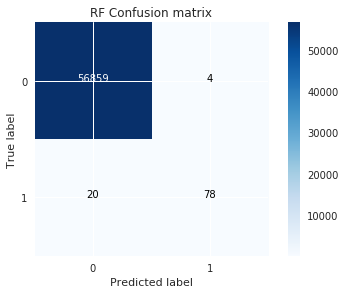

Precision =     0.9512
Recall    =     0.7959
F1_score  =     0.8667


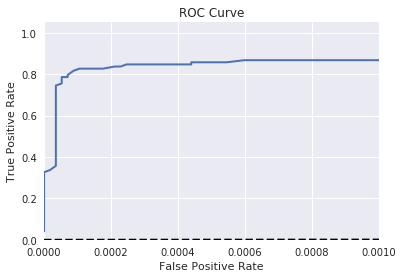

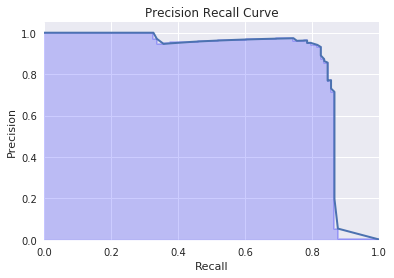

In [260]:
# Ramdom forest Classifier
rf_cfl = RandomForestClassifier(n_estimators = best_parameters['n_estimators'], # 100, 
                                 max_features = best_parameters['max_features'], #3, 
                                 min_samples_leaf = best_parameters['min_samples_leaf'], #1, 
                                 min_samples_split = best_parameters['min_samples_split'], #2, 
                                 n_jobs = -1,
                                 random_state = 42)

rf_cfl.fit(X_train, y_train)
y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
#plt.savefig('3.rf_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_rf, tpr_rf, t_rf = fpr, tpr, t
precision_rf, recall_rf, thresholds_rf = precision, recall, thresholds

## 7. VotingClassifier = LOG - XGB - RF

### 7.1. VotingClassifier

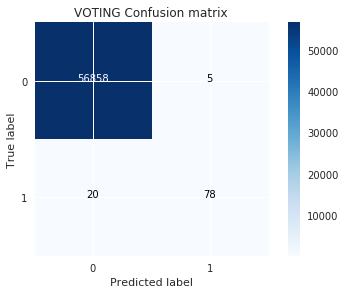

Precision =     0.9398
Recall    =     0.7959
F1_score  =     0.8619


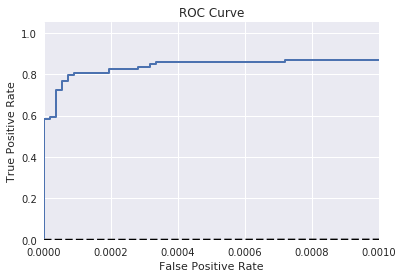

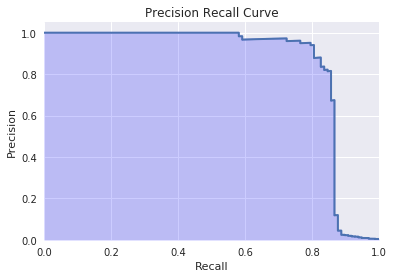

In [266]:
#Voting Classifier
voting_cfl = VotingClassifier (
        estimators = [('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)],
                     voting='soft', weights = [1, 1, 1.33])
    
voting_cfl.fit(X_train,y_train)

y_pred = voting_cfl.predict(X_test)
y_score = voting_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'VOTING Confusion matrix')
plt.savefig('1.voting_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_voting, tpr_voting, t_voting = fpr, tpr, t
precision_voting, recall_voting, thresholds_voting = precision, recall, thresholds